# Wine Quality Exploratory Data Analysis

**Your Name** Logan Ash  
**Date:** May 13, 2025

This notebook performs an initial exploratory analysis of the Wine Quality dataset from the UCI Machine Learning Repository. This dataset contains various physicochemical properties of red wines, along with quality ratings, making it suitable for exploring relationships between chemical attributes and wine quality.

## Dataset Overview

The Wine Quality dataset includes samples of red wine with measurements of 11 chemical properties and a quality score. This analysis will serve as the foundation for understanding how these properties might influence wine quality, which could be valuable for wineries seeking to optimize their production processes.

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default styling for plots
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)


## Load the Data


In [2]:
# Load the red wine quality dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_df = pd.read_csv(url, sep=';')

# Display success message
print(f"Data loaded successfully with {red_df.shape[0]} rows and {red_df.shape[1]} columns.")

Data loaded successfully with 1599 rows and 12 columns.



## Basic Properties

### Column Names


In [3]:
# View column names
print("Column names:")
print(red_df.columns.tolist())

Column names:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']



### DataFrame Shape


In [4]:
# Get DataFrame shape (rows, columns)
print(f"Dataset dimensions: {red_df.shape[0]} rows x {red_df.shape[1]} columns")

Dataset dimensions: 1599 rows x 12 columns



### Data Types


In [5]:
# Check data types of each column
print("Data types for each column:")
print(red_df.dtypes)

Data types for each column:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object



### DataFrame Information


In [6]:
# Summary of DataFrame - displays data types and non-null values
print("DataFrame information:")
red_df.info()

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



## Sample Records

### First 5 Rows


In [7]:
# Display first 5 rows
print("First 5 rows:")
red_df.head()

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



### Last 5 Rows


In [8]:
# Display last 5 rows
print("Last 5 rows:")
red_df.tail()

Last 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6



### Random Sample


In [9]:
# Display random sample of 5 rows
print("Random sample of 5 rows:")
red_df.sample(5, random_state=42)

Random sample of 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6



## Descriptive Statistics


In [10]:
# Generate descriptive statistics for all numeric columns
print("Descriptive statistics:")
red_df.describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000



## Missing Values Check


In [11]:
# Check for missing values in each column
missing_values = red_df.isna().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() == 0:
    print("Great! No missing values found in the dataset.")
else:
    print(f"Found {missing_values.sum()} missing values in the dataset.")

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Great! No missing values found in the dataset.



## Distribution of Wine Quality


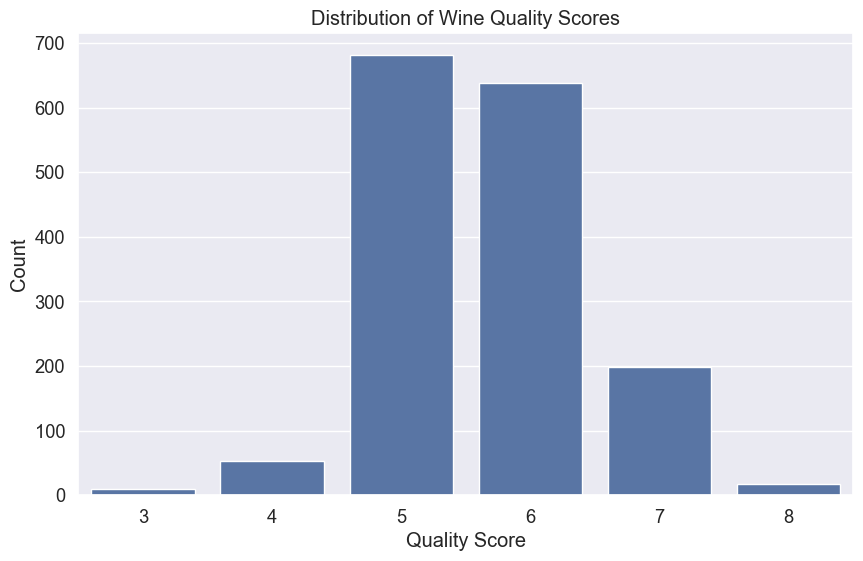

Percentage distribution of quality scores:
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
Name: proportion, dtype: float64


In [12]:
# Plot the distribution of wine quality scores
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=red_df)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each quality score
quality_percentage = red_df['quality'].value_counts(normalize=True) * 100
print("Percentage distribution of quality scores:")
print(quality_percentage.sort_index())


## Correlation Analysis


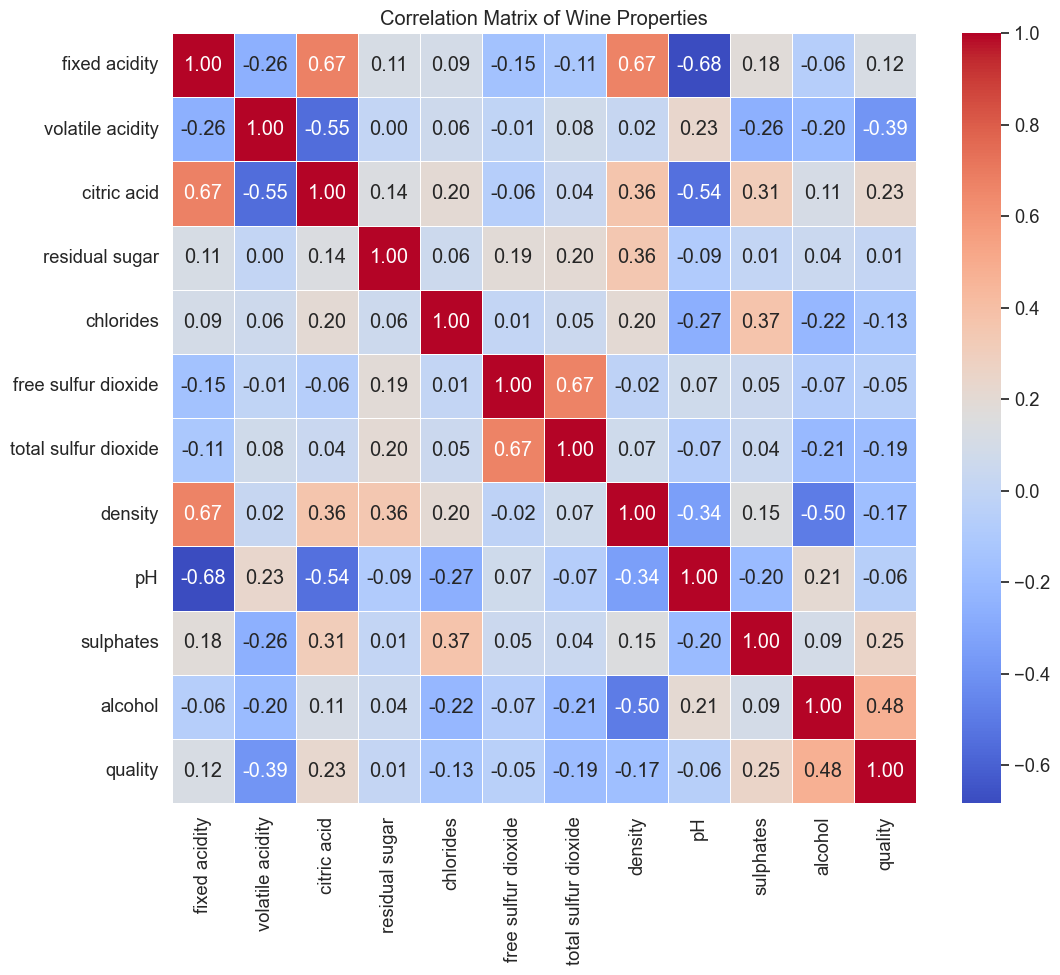

Correlations with wine quality (sorted):
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [13]:
# Calculate correlation matrix
correlation_matrix = red_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Wine Properties')
plt.show()

# Find correlations with quality
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlations with wine quality (sorted):")
print(quality_correlations)


## Summary of Findings

Based on this initial exploratory analysis, we've gained several insights:

1. The dataset contains [number] samples of red wine with 11 chemical properties and a quality rating.
2. There are no missing values in the dataset, which is excellent for analysis.
3. The wine quality scores range from [min] to [max], with the majority of wines rated as [most common score].
4. The chemical properties with the strongest positive correlations with quality appear to be [top correlations].
5. The chemical properties with the strongest negative correlations with quality appear to be [bottom correlations].

## Next Steps

For further analysis, we should:

1. Perform more detailed visualization of the relationships between key chemical properties and quality
2. Investigate potential outliers in the dataset
3. Consider feature engineering to create new variables that might better explain wine quality
4. Develop predictive models to estimate wine quality based on chemical properties
5. Conduct cluster analysis to identify distinct profiles of wines

These analyses will provide valuable insights for wineries looking to optimize their production processes and improve wine quality.


### Descriptive Statistics
Summary statistics for each feature in the dataset.

In [14]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### First Few Rows
Display the first five rows of the dataset.

In [15]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Last Few Rows
Display the last five rows of the dataset.

In [16]:
red_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Random Sample
Show a random sample of five rows.

In [17]:
red_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
1412,8.2,0.240,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.9,6
876,7.1,0.470,0.00,2.2,0.067,7.0,14.0,0.99517,3.40,0.58,10.9,4
1248,6.9,0.410,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,6


### Dataset Info
General info including non-null counts and data types.

In [18]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
